In [2]:
import numpy as np
import numpy.random as nr
import random
#import itertools
import scipy.misc

import matplotlib
import matplotlib.pyplot as plt
from scipy.special import logsumexp

#%matplotlib notebook
#%matplotlib qt 
%matplotlib inline 
import time
np.set_printoptions(formatter={'float': lambda x: "{0:0.2f}".format(x)})


from grid_world_new import grid_world
from q_agent_class import Qagent

In [2]:
np.diag(np.array([1,2]))

array([[1, 0],
       [0, 2]])

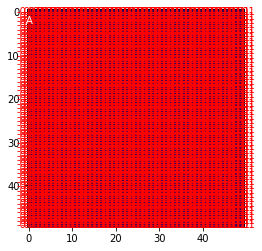

In [3]:
walls = np.array([[0,0,0,0,0,0,0,0,0],
                 [0,0,0,0,0,0,0,0,0],
                 [0,0,0,0,0,0,0,0,0],
                 [0,0,0,0,0,0,0,0,0],
                 [0,0,0,0,0,0,0,0,0],
                 [0,0,0,0,0,0,0,0,0],
                ])


walls = np.array([[0,0,0,0,0,0,0,1,0],
                 [0,0,1,0,0,0,0,1,0],
                 [0,0,1,0,0,0,0,1,0],
                 [0,0,1,0,0,0,0,1,0],
                 [0,0,0,0,0,1,0,0,0],
                 [0,0,0,0,0,0,0,0,0],
                ])




rewards = np.array(
                [[-1,-1,-1,-1,-1,-1,-1,-1, -1],
                 [-1,-1,-1,-1,-1,-1,-1,-1, -1],
                 [-1,-1,-1,-1,-1,-1,-1,-1, -1],
                 [-1,-1,-1,-1,-1,-1,-1,-1, -1],
                 [-1,-1,-1,-1,-1,-1,-1,-1, -1],
                 [-1,-1,-1,-1,-1,-1,-1,-1, -1],
                ])




rewards = -1*.01*rewards
#walls = np.array([[0,0,0,0],
 #                [0,0,1,0],
 #                [0,0,1,0],
 #                [0,0,1,0],
 #               ])
#rewards =  np.array([[-1,-1,-1,-1],
#                 [-1,-1,0,-1],
#                 [-1,-1,0,-1],
#                 [-1,-1,0,-1],
#                ])

walls = np.zeros((50,50))
rewards = -.01*np.ones((50,50))


start_state = np.array([2,0])

transition_noise = 0

gw = grid_world(rewards, walls, start_state, transition_noise)
f,(ax1) = plt.subplots(1) # plot environment
gw.render(ax1)
plt.show()

In [5]:
Tsas = gw.make_Tsas()
Rsa = gw.Rsa

# make a Q agent starting with these
params = {'beta': 50, 'alpha_q': 1, 'gamma': .9}
n_states = int(np.size(walls))

qag = Qagent(params, n_states, Tsas = Tsas, Rsa = Rsa, grid = True, wall_mtx = walls)

In [4]:
# build the DR
pol_mtx = qag.comp_pi() # first get the policy implied by the current value function # (just need any policy though)
Tss = qag.comp_Tss(pol_mtx) # state - state transition matrix - this is just Tsas, marginalizing out the actions
DR_mtx = qag.comp_DR(Tss,pol_mtx) # build SR from this state-state matrix. 
# plot the SR
f,(ax1) = plt.subplots(1) # plot environment

s = 1 # choose a state to show...
gw.render_vec(DR_mtx[325,:], ax1)

NameError: name 'qag' is not defined

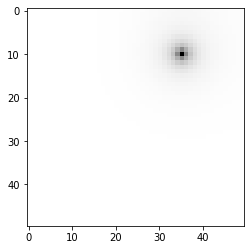

In [8]:
# build the DR
pol_mtx = qag.comp_pi() # first get the policy implied by the current value function # (just need any policy though)
Tss = qag.comp_Tss(pol_mtx) # state - state transition matrix - this is just Tsas, marginalizing out the actions
DR_mtx = qag.comp_DR(Tss,pol_mtx) # build SR from this state-state matrix. 
# plot the SR
f,(ax1) = plt.subplots(1) # plot environment

s = 1 # choose a state to show...
gw.render_vec(DR_mtx[:,535].T, ax1)

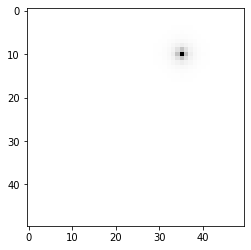

In [9]:
# build the SR
pol_mtx = qag.comp_pi() # first get the policy implied by the current value function # (just need any policy though)
Tss = qag.comp_Tss(pol_mtx) # state - state transition matrix - this is just Tsas, marginalizing out the actions
SR_mtx = qag.comp_SR(Tss) # build SR from this state-state matrix. 
# plot the SR
f,(ax1) = plt.subplots(1) # plot environment

s = 1 # choose a state to show...
gw.render_vec(SR_mtx[:,535].T, ax1)

In [12]:
def signed_amp(x):
  """Return sign(x) * amp(x), where amp is amplitude of complex number."""
  return np.sign(np.real(x)) * np.sqrt(np.real(x) ** 2 + np.imag(x) ** 2)

def eig(x, order="descend", sortby=signed_amp):
  """Computes eigenvectors and returns them in eigenvalue order.
  Args:
    x: square matrix to eigendecompose
    order: "descend" or "ascend" to specify in which order to sort eigenvalues
      (default="descend")
    sortby: function transforms a list of (possibly complex, possibly mixed
      sign) into real-valued scalars that can be sorted without ambiguity
      (default=signed_amp)
  Returns:
    evecs: array of eigenvectors
    evals: matrix with eigenvector columns
  """
  assert x.shape[0] == x.shape[1]
  n = x.shape[0]
  evals, evecs = np.linalg.eig(x)

  ind_order = range(n)
  ind_order = [x for _, x in sorted(zip(sortby(evals), ind_order))]
  if order == "descend":
    ind_order = ind_order[::-1]
  evals = evals[ind_order]
  evecs = evecs[:, ind_order]
  return evecs, evals

In [13]:
(evecs,evals) = eig(DR_mtx)

In [1]:
eig_sa = signed_amp(evecs)
f,(ax1) = plt.subplots(1) # plot environment
gw.render_vec(eig_sa[:,15], ax1)

NameError: name 'signed_amp' is not defined

In [70]:
eig_sa.shape

(2500, 2500)

In [34]:
v

array([[-0.02      +0.j,  0.03996053+0.j, -0.03998026+0.j, ...,
        -0.00413082+0.j, -0.00578082+0.j, -0.00556136+0.j],
       [-0.02      +0.j,  0.03980283+0.j, -0.03990137+0.j, ...,
        -0.00166824+0.j, -0.01730758+0.j, -0.01581295+0.j],
       [-0.02      +0.j,  0.03948804+0.j, -0.0397439 +0.j, ...,
         0.02946982+0.j,  0.04462831+0.j,  0.04264001+0.j],
       ...,
       [-0.02      +0.j,  0.03948804+0.j,  0.0397439 +0.j, ...,
         0.02946982+0.j,  0.04462831+0.j,  0.04264001+0.j],
       [-0.02      +0.j,  0.03980283+0.j,  0.03990137+0.j, ...,
        -0.00166824+0.j, -0.01730758+0.j, -0.01581295+0.j],
       [-0.02      +0.j,  0.03996053+0.j,  0.03998026+0.j, ...,
        -0.00413082+0.j, -0.00578082+0.j, -0.00556136+0.j]])

In [36]:
DR_mtx

array([[3.32, 1.66, 0.89, ..., 0.00, 0.00, 0.00],
       [1.66, 2.55, 1.27, ..., 0.00, 0.00, 0.00],
       [0.89, 1.27, 2.34, ..., 0.00, 0.00, 0.00],
       ...,
       [0.00, 0.00, 0.00, ..., 2.34, 1.27, 0.89],
       [0.00, 0.00, 0.00, ..., 1.27, 2.55, 1.66],
       [0.00, 0.00, 0.00, ..., 0.89, 1.66, 3.32]])